<a href="https://colab.research.google.com/github/samkhushal/Internship/blob/main/Task6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TASK 6:**

**Classification with Random Forest**

Build a classification model using a Random Forest algorithm on a dataset with categorical target variables. Evaluate the model's performance using metrics like accuracy and precision.

Dataset Link :- https://archive.ics.uci.edu/dataset/228/sms+spam+collection

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import io
import numpy as np
import nltk


In [1]:
from google.colab import files
up = files.upload()

Saving spam.csv to spam.csv


In [4]:
df= pd.read_csv('spam.csv',encoding="ISO-8859-1")

In [5]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [6]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [7]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
sms = "hey there you won peize worth rs 10000000, follow the given link to claim your prize"

In [9]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [10]:
from nltk.tokenize import word_tokenize

In [11]:
word_tokenize(sms)

['hey',
 'there',
 'you',
 'won',
 'peize',
 'worth',
 'rs',
 '10000000',
 ',',
 'follow',
 'the',
 'given',
 'link',
 'to',
 'claim',
 'your',
 'prize']

In [12]:
from nltk.corpus import stopwords

swords= stopwords.words('english')


In [14]:
clean = [ word for word in word_tokenize(sms) if word not in swords]

In [15]:
clean

['hey',
 'peize',
 'worth',
 'rs',
 '10000000',
 ',',
 'follow',
 'given',
 'link',
 'claim',
 'prize']

In [21]:
sent = 'Hello friends! How are you? We will learning python and into that we are to be stating with pandas library today'

def clean_text(sent):
    tokens = word_tokenize(sent)
    clean = [word for word in tokens if word.isdigit() or word.isalpha()]
    clean = [ps.stem(word) for word in clean
         if word not in swords]
    return clean

In [22]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
clean = [ps.stem(word) for word in word_tokenize(sent)
         if word not in swords]

In [23]:
clean_text(sent)

['hello',
 'friend',
 'how',
 'we',
 'learn',
 'python',
 'state',
 'panda',
 'librari',
 'today']

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(analyzer=clean_text)

In [25]:
x = df['v2']
y = df['v1']

<Axes: xlabel='v1', ylabel='count'>

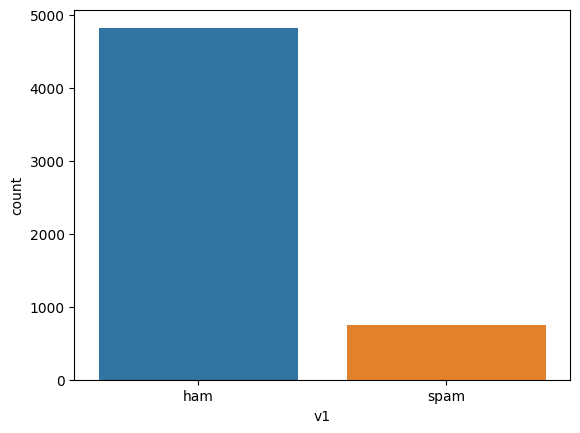

In [26]:
x_new = tfidf.fit_transform(x)

x.shape

x_new.shape

import seaborn as sns
sns.countplot(x=y)

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_new,y,test_size=0.25,random_state=1)

print(f"Size of splitted data")
print(f"x_train {x_train.shape}")
print(f"y_train {y_train.shape}")
print(f"y_test {x_test.shape}")
print(f"y_test {y_test.shape}")

Size of splitted data
x_train (4179, 6450)
y_train (4179,)
y_test (1393, 6450)
y_test (1393,)


In [28]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state=1)
model_rf.fit(x_train,y_train)

RandomForestClassifier(random_state=1)

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_new,y,test_size=0.25,random_state=1)

print(f"Size of splitted data")
print(f"x_train {x_train.shape}")
print(f"y_train {y_train.shape}")
print(f"y_test {x_test.shape}")
print(f"y_test {y_test.shape}")







Size of splitted data
x_train (4179, 6450)
y_train (4179,)
y_test (1393, 6450)
y_test (1393,)


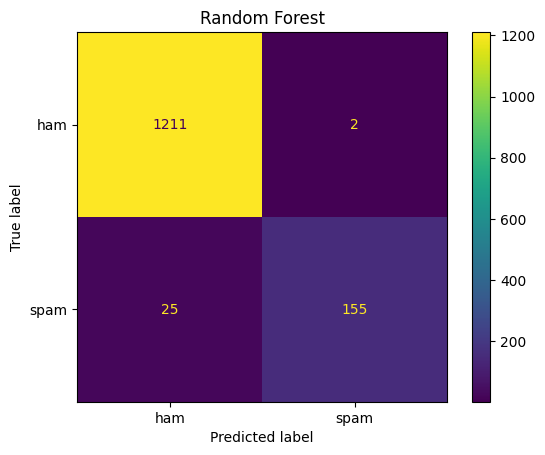

 Accuracy is 0.9806173725771715
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1213
        spam       0.99      0.86      0.92       180

    accuracy                           0.98      1393
   macro avg       0.98      0.93      0.95      1393
weighted avg       0.98      0.98      0.98      1393



In [33]:

from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state=1)
model_rf.fit(x_train,y_train)

y_pred_rf = model_rf.predict(x_test)

ConfusionMatrixDisplay.from_predictions(y_test,y_pred_rf)
plt.title('Random Forest')
plt.show()
print(f" Accuracy is {accuracy_score(y_test,y_pred_rf)}")
print(classification_report(y_test,y_pred_rf))

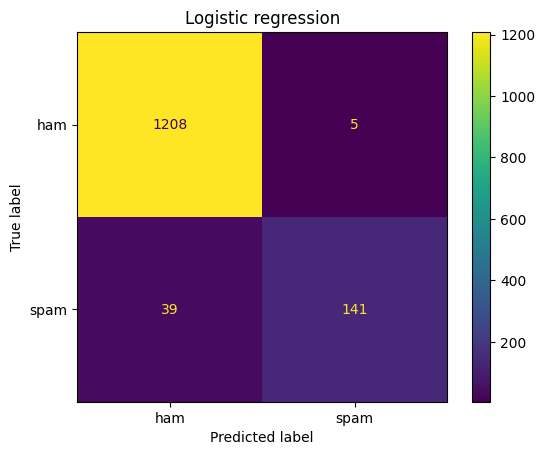

 Accuracy is 0.968413496051687
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1213
        spam       0.97      0.78      0.87       180

    accuracy                           0.97      1393
   macro avg       0.97      0.89      0.92      1393
weighted avg       0.97      0.97      0.97      1393



In [34]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(random_state=1)

model_lr.fit(x_train,y_train)
y_pred_lr = model_lr.predict(x_test)

ConfusionMatrixDisplay.from_predictions(y_test,y_pred_lr)
plt.title('Logistic regression')
plt.show()
print(f" Accuracy is {accuracy_score(y_test,y_pred_lr)}")
print(classification_report(y_test,y_pred_lr))

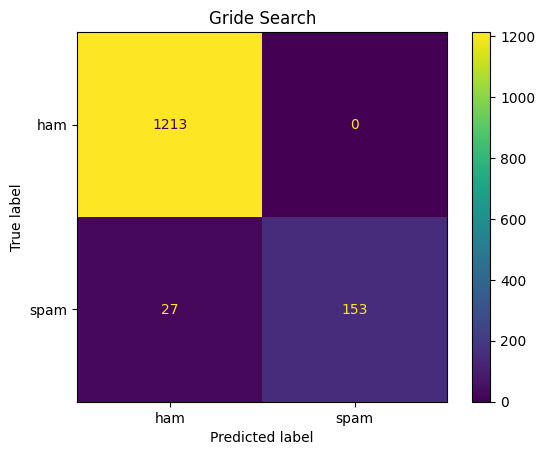

 Accuracy is 0.9806173725771715
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1213
        spam       1.00      0.85      0.92       180

    accuracy                           0.98      1393
   macro avg       0.99      0.93      0.95      1393
weighted avg       0.98      0.98      0.98      1393



In [35]:
from sklearn.model_selection import GridSearchCV

para = {

    'criterion':['gini', 'entropy','log_loss'],
#     'max_features': ['sqrt','log2'],
#     'random_state': [0,1,2,3,4],
    'class_weight':['balanced','balanced_subsample']
}

grid = GridSearchCV(model_rf, param_grid=para, cv=5, scoring='accuracy')

grid.fit(x_train,y_train)

rf = grid.best_estimator_

y_pred_grid = rf.predict(x_test)

ConfusionMatrixDisplay.from_predictions(y_test,y_pred_grid)
plt.title('Gride Search')
plt.show()
print(f" Accuracy is {accuracy_score(y_test,y_pred_grid)}")
print(classification_report(y_test,y_pred_grid))